<div dir="rtl" align="center">
    <h2><strong> HW3: CNN </strong></h2>
</div>

Sepehr Moniri -- 981813205

In [1]:
import torch

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from matplotlib import pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### **Load train and test CIFAR10 dataset**

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = datasets.CIFAR10(
    root='./data/CIFAR10_data/',
    download=True,
    train=True,
    transform=transform
)

valset = datasets.CIFAR10(
    root='./data/CIFAR10_data/',
    download=True,
    train=False,
    transform=transform
)

100%|██████████| 170498071/170498071 [00:13<00:00, 12300215.09it/s]


Extracting ./data/CIFAR10_data/cifar-10-python.tar.gz to ./data/CIFAR10_data/
Files already downloaded and verified


In [3]:
trainset.data.shape

(50000, 32, 32, 3)

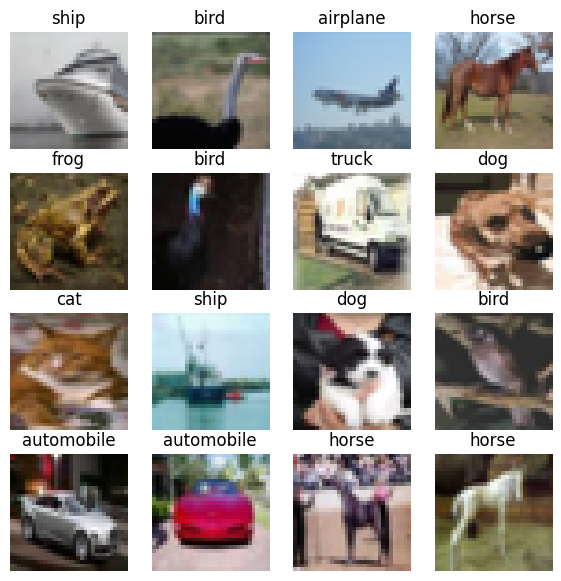

In [4]:
torch.manual_seed(48)

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(7, 7))

rnd_img_idx = torch.randint(0, trainset.data.shape[0], (axes.size,))

for iax in range(axes.size):
    i = iax // axes.shape[0]
    j = iax % axes.shape[0]
    img = trainset.data[rnd_img_idx[iax]]
    _ = axes[i, j].imshow(img)
    _ = axes[i, j].set_title(trainset.classes[trainset.targets[rnd_img_idx[iax]]])
    _ = axes[i, j].set_axis_off()

### **Construct Dataloader of Train and Validation**

In [5]:
# TODO: COMPLETE THIS CODE
batch_size = 64
# trainloader = ...
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

# valloader = ...
valloader = DataLoader(valset, batch_size=batch_size, shuffle=False, num_workers=2)

### **Construct Convolutional Neural Network (CNN) Model**

In [6]:
class CNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # TODO: COMPLETE THIS CODE
        # ...
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # TODO: COMPLETE THIS CODE
        # ...
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

### **Define Criterion and Optimizer**

In [7]:
model = CNN()

# TODO: COMPLETE THIS CODE

# criterion = ...
# optimizer = ...

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

### **Training & Evaluating CNN Model**

In [11]:
# Training & Evaluating CNN Model

EPOCHS = 10
train_losses, val_losses = list(), list()

for epoch in range(EPOCHS):  # loop over the dataset multiple times
    running_loss = 0.0
    for images, labels in trainloader:
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()

    running_loss = running_loss/len(trainloader)
    train_losses.append(running_loss)

    # Validation loss
    val_running_loss = 0.0
    with torch.no_grad():
        model.eval()  # Set the model to evaluation mode
        for images, labels in valloader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()
    val_losses.append(val_running_loss/len(valloader))

    model.train()  # Set the model back to training mode


    print(f'epoch {epoch + 1}: train loss: {running_loss} -- Validation Loss: {val_losses[-1]}')

print('Finished Training')

epoch 1: -- train loss: 1.28969014529377, Validation Loss: 1.2822281205730073
epoch 2: -- train loss: 1.253565527898881, Validation Loss: 1.2759200163707611
epoch 3: -- train loss: 1.2240199143319483, Validation Loss: 1.2181449095914318
epoch 4: -- train loss: 1.191368596633072, Validation Loss: 1.2358590144260673
epoch 5: -- train loss: 1.164747557600441, Validation Loss: 1.188218257229799
epoch 6: -- train loss: 1.1356972330214117, Validation Loss: 1.152840528518531
epoch 7: -- train loss: 1.1153853112626868, Validation Loss: 1.1458639210196817
epoch 8: -- train loss: 1.0898692026315138, Validation Loss: 1.1301024275220883
epoch 9: -- train loss: 1.0708580658868756, Validation Loss: 1.1150407062214651
epoch 10: -- train loss: 1.0485034565943891, Validation Loss: 1.105546958127599
Finished Training


In [9]:
# EPOCHS = 10
# train_losses, val_losses = list(), list()

# for epoch in range(EPOCHS):
#     for images, labels in trainloader:
#         # TODO: COMPLETE THIS CODE
#         ...

#     print(...)

### **Plot Train and Validation Losses**

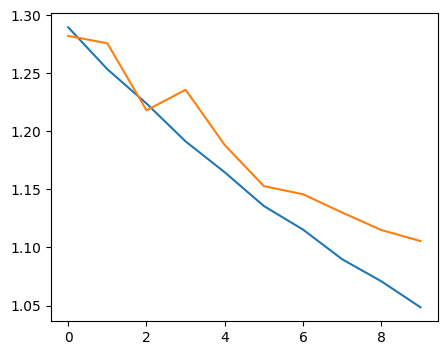

In [12]:
fig, ax = plt.subplots(figsize=(5, 4))

_ = ax.plot(train_losses, label="train loss")
_ = ax.plot(val_losses, label="val loss")